# GRADTDA5622 - Big Data Computing Foundations 2
## Case Study 2: CRISP-DM Data Preparation
Replace the example information below with your real information:
- Semester: Spring 2025
- Instructor: Brad Coy
- Student Name(s): Samuel Jordan, David Mullins, Lisa Siefker
- Student Email(s): jordan.194, mullins.129, siefker.69

Based on CRISP-DM Template Version V12.
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

**NOTE: This assignment uses the results of Case Study 1, with the same dataset.**

### Assignment Overview
In this assignment, you will analyze an ALTERED copy of the “Hotel Booking Demand” dataset.
- This dataset was pulled on 4/8/22 from: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
- The dataset file is named: **hotel_bookings_with_errors_V1.csv**

**The data has been altered slightly for use in course assignments,etc.:**
- A unique ROW attribute has been added.
- Errors have been added, such as: duplicated records, deleted records, deleted attribute values, erroneous attribute values.
**DO NOT PUBLISH THIS DATASET - it contains intentionally wrong data!**

This assignment covers the **Step 3 - Data Preparation** of the six steps of the **CRISP-DM process model**.

**The Objectives of This Assignment are:**
1. To perform the CRISP-DM Data Preparation step, based on the work you did in Case Study 1 for the Data Understanding step.
2. To get practice using common functions in Python / Pandas.
3. To get practice discussing / explaining your results, findings, and insights.
4. The results of this step will help set the stage for the remaining CRISP-DM steps, in which you may practice deeper analysis and model-building in the future.

### Problem Statement
Assume that you are the Director of Data Science for Buckeye Resorts, Inc. (BRI), an international hotel chain.  As is the case for all hotel chains, reservation cancellations cause significant impacts to BRI, in profitability, logistics, and other areas.  The cost to BRI of a cancelled reservation is $500 on average.

- BRI wants to improve (decrease) the cancellation rates at its hotels, using more tailored interventions, based on newly available detailed data.  BRI processes 100,000 reservations per year, so an incremental improvement in cancellation rates would have a significant impact.

- One intervention being considered is to offer a special financial incentive to customers who have reservations, but who are “at risk” of cancellation.  BRI has performed a small pilot test, and has found that offering a $100 discount to a customer who is planning to cancel is effective 30% of the time in inducing the customer not to cancel (by locking in a no-cancellation clause in exchange for the discount).

- BRI leadership asked your team to analyze the new data, and determine if it is suitable for developing analyses and models that would be effective in predicting which future reservations are likely to be at risk of cancellation, so the aforementioned financial incentive could be offered.

- The head of BRI would then like you attend the upcoming BRI Board of Directors meeting.  She has asked you to present your findings to her and to the BOD, to help them decide whether to go forward with the planned tailored intervention approach, and/or to adjust or abandon the approach.  Your goal is to support the BOD in making a decision.

You **now** need to create (prepare) a clean dataset from the Case Study 1 results.  **This data will be used in future steps to evaluate various classification models to see if they are effective at predicting reservations "at risk" of being cancelled.  Assume the Class variable is the "is_canceled" attribute, and prepare your dataset so it can be used to predict the is_canceled attribute from other, relevant attributes.**  You do not yet know the specific algorithm, formula or model you will use to predict cancellations.  **That will come in later steps.**

### Things To Do
- Fill in the following sections:
  - **Sections 1 and 2 (Business Understanding and Data Understanding)**: Please **copy your Case Study 1 results** into this notebook.  The template is exactly the same, so you should be able to simply copy/paste the cells from the CS1 notebook to this notebook. (You can highlight them all at once and do a single copy/paste - select and shift-click.)
  - **Section 3 (Data Preparation)**: **Fill in** this section, based on what you discovered in Section 2.
  - **Conclusions**: **Fill in** this section at the end.
  - You may **ignore** the other sections.
- You may use the sample code in this module's asynchronous lectures and walkthroughs and/or include other visualizations and analyses from other sources.
- Be sure to write useful comments in the **Discussion** cells.

It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code).
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results.

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them in the spaces below.
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
  - You may choose to use markdown instead of raw text in the answer cells, to make them "pretty" and easy to read.
***

**Context**
- What is the overview, history, big picture?

This dataset represents hotel booking activity for two types of hotels: city hotels resort hotels. It includes details on daily rates, reservations, cancellations, and customer demographics. Buckeye Resorts, Inc. (BRI), wants to analyze this dataset to determine if it can be used to predict reservation cancellations.

**Business Objectives**
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

The problem that BRI wants to address is reducing the number of cancelled hotel reservations that it encounters, each of which costs the company about $500. The opportunity lies in predicting which reservations are at risk of cancellation and then offering targeted financial incentives to customers that are intended to discourage them from cancelling.

**Stakeholders**
- Who are they?
- What are their needs?

Key stakeholders include Buckeye Resorts, Inc. (BRI) Board of Directors and leadership team. They need data insights to decide whether to implement a targeted incentive program to reduce cancellations. Another key stakeholder is the data science team, which needs to determine whether the given dataset is suitable for building a predictive model to identify at-risk reservations.

**General Goals**
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions?  What are they?
- Support decisions?  What are they?

The primary goals are to analyze historical booking data to understand cancellation patterns and assess whether predictive modeling can identify at-risk reservations. Key questions include:

*   What factors contribute to cancellations?
*   Can cancellations be predicted accurately?
*   Can customers who are most likely to cancel be identified?

**Scope**
- What is the specific scope of the project?
- What, specifically, is NOT in scope?  (What are you not doing that someone might think you are doing?)
Is the scope flexible?  In what way?

The scope of this project involves analyzing the dataset to determine if it is suitable for predicting hotel reservation cancellations. This scope includes:

*   Assessing the quality of the dataset.
*   Identifying key factors that influence cancellations.
*   Evaluating a potential model for predicting at-risk reservations.

The scope is flexible to an extent, as new insights from data exploration may refine the focus of the research.

If a viable predictive model is identified, implementing it  within BRI's reservations system is outside the scope of this project.

**Deliverables**
- Report?
- Reusable code?
- Presentation?

The deliverables for this project include:

*   A report summarizing key findings and recommendations.
*   A presentation for BRI leadership and Board of Directors.
*   A Colab Notebook with reusable code for cleaning the dataset and identifying a potential predictive model.



**Success Criteria**
- What, specifically, must be accomplished for this project to be a success?

This project will be a success if it provides actionable insights for BRI leadership to determine whether the dataset is suitable for predicting reservation cancellations. This includes identifying key factors that influence cancellations and a potential model for predicting them.

**Solution Approach**
- Is this a “one time” (throw away) solution?
- Or will the solution become part of repeated process that is used and enhanced over time?

This solution is intended to be part of a repeated process that can be refined and enhanced over time. While the initial analysis will help to determine if the dataset is suitable for predictive modeling, such modeling could be optimized and improved in future iterations of this project.

**Quality**
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

This project will require enough confidence in the findings to justify further investment in predictive modeling. As such, a reasonable confidence level to employ with the predictive modeling is 95%. The results should be directionally correct in terms of providing reliable insights into cancellation patterns and incentive strategies.

**Constraints**
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

There are no apparent legal or regulatory constraints with this project, as the dataset does not contain personally identifiable information. At this initial phase, the only architectural constraint to note is the limited dataset that will be the focus of the project's analysis.

**Time / Cost**
- What is the deadline or budget?

There are no specific deadlines or budget. However, the financial impact of cancellations suggests that the project's insights should be provided in a timely and cost-effective manner.

**Dependencies**
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

This project relies on insights BRI gathered through their initial pilot, which established that incentives have a desired impact on reducing cancellations on at-risk reservations. If BRI decides to implement a future incentive strategy using predictive modeling, the findings of this project will inform those future efforts.

**Resources Needed**
- Do you potentially need access to specific people, data, etc?

The primary resource needed for this project is the dataset itself, which has already been provided. The assumption at point is that no additional information or access will be required.

**Other Considerations**
- What other considerations, not covered above, might be relevant?

If the dataset contains errors or distortions, these will need to be addressed before identifying a suitable predictive model. In addition, it should be noted that external factors such as economic conditions or competitor strategies might impact the effectiveness of any predictive model that this project might produce.

***
# Section: 2 - Data Understanding
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **For this example, we will not do this separate first pass.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**

**Discussion:**

The Hotel Booking Demand dataset comprises booking information for a city hotel and a resort hotel that was gathered between July 2015 and August 2017. It includes 33 attributes detailing various aspects of hotel bookings.

Given the project's goal to create a predictive model for identifying at-risk reservations, some of the most important attributes at this initial phase appear to be the following:

**Booking Details**
*  type of hotel (hotel)
*  booking status (is_canceled)
*  days between booking and arrival (lead_time)
*  date of last update on reservation (reservation_status_date)

**Guest Demographics**
*  guest's country of origin (country)
*  counts of each guest type (adults, children, babies)

**Stay Information**
*  day of guest's arrival (arrival_date_year)
*  month of guest's arrival (arrival_date_month)
*  Number of weekend stays (stays_in_weekend_nights)
*  Number of weekday stays (stays_in_week_nights)

**Financial Information**
*  adr (average daily rate)
*  deposit_type (type of deposit made to hold reservation)

**Special Requests:**
*  guest requests for reserved parking spots (required_car_parking_spaces)
*  number of special requests from guests (total_of_special_requests)

### **Load the Dataset.**

In [2]:
#OPTIONAL: Load it only once per session, and save it, so we don't waste time.

#NOTE: You may need to change the path to the data file, depending on your setup.

try:
    _ = data_from_source_file_df
    print("Reusing source data")
except:
    print("Loading source data")
    # data_from_source_file_df = pd.read_csv("../shared_Sp23/hotel_bookings_with_errors_V1.csv")
    data_from_source_file_df = pd.read_csv("https://bcoy48.github.io/osu-gradtda-5622-sp25/course_materials/case_studies/1/hotel_bookings_with_errors_V1.csv")
data_df = data_from_source_file_df
print("Done!")

Loading source data
Done!


In [3]:
# Print the schema, based on the data in the file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ROW                             119391 non-null  int64  
 1   hotel                           119391 non-null  object 
 2   is_canceled                     119390 non-null  float64
 3   lead_time                       119391 non-null  int64  
 4   arrival_date_year               119391 non-null  int64  
 5   arrival_date_month              119391 non-null  object 
 6   arrival_date_week_number        119391 non-null  int64  
 7   arrival_date_day_of_month       119391 non-null  int64  
 8   stays_in_weekend_nights         119391 non-null  int64  
 9   stays_in_week_nights            119391 non-null  int64  
 10  adults                          119391 non-null  int64  
 11  children                        119387 non-null  float64
 12  babies          

**Discussion:**

The dataset consists of 33 attributes and 119,391 records. There are 16 integer columns, 5 float columns, and 12 categorical (object) columns. Notable aspects include the following:

* Missing values appear to be present in five attributes: "is_canceled", "children", "country", "agent", and "company".

* Categorical variables like "hotel", "meal", "country", and "market_segment" may require encoding for modeling (e.g., converting "City Hotel" and "Resort Hotel" into 0 and 1).

* Date-related fields like "arrival_date_year", "arrival_date_month", and "reservation_status_date" may need to be converted into a datetime format for analysis.

In [4]:
# Create some simple lists for future use
all_attribute_names = list(data_df)
print(all_attribute_names)
class_attribute_name = []
nominal_attribute_names = []
ordinal_attribute_names = []
categorical_attribute_names = nominal_attribute_names + ordinal_attribute_names
interval_attribute_names = []
ratio_attribute_names = []
numerical_attribute_names = interval_attribute_names + ratio_attribute_names

['ROW', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


**Discussion:**
- Please fill in a response...

**Discussion:**

The dataset's attributes are now prepared to be classified as nominal, ordinal, interval, and ratio variables in subsequent step of the CRISP-DM process.

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [5]:
# # This is an optional step.  Pandas Profiling is a library that provides a sophisticated profiling report
# #  that can be saved in the form of an interactive HTML file.  See: https://pypi.org/project/pandas-profiling/
# #  It may run very slowly on large datasets.  It is best to limit the number of records to profile, based on
# #  experimentation with your computer.  You can do so by profiling small samples from large datasets.
# #  You also can specify the "minimal=True" argument in newer versions of the library.
# # To install, uncomment and run the following line (one time).
# #!pip install pandas_profiling

# import pandas_profiling
# if data_df.shape[0] > 500:
#     profile = pandas_profiling.ProfileReport(data_df.sample(n=500))  # Limit to a small set of records.
#     #profile = pandas_profiling.ProfileReport(data_df, minimal=True)  # Limit to the simpler profiling.
# else:
#     profile = pandas_profiling.ProfileReport(data_df)
# profile.to_file("./profilereport.html")

# # Set plotting back to interactive mode (pandas_profiling sets it to non-interactive)
# %matplotlib inline

**Discussion:**
- Please fill in a response...

In [6]:
data_df.describe() #calculates statistics for all numerical columns

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119391.000000,119390.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,119387.000000,119391.000000,119391.000000,119391.000000,119391.000000,119391.000000,103051.00000,6797.000000,119391.000000,119391.000000,119391.000000,119391.000000
mean,59694.000050,0.370408,104.010662,2016.156544,27.165172,15.798117,0.927591,2.500297,1.856572,0.103889,0.007949,0.031912,0.087117,0.137096,0.221122,86.69487,189.266735,2.321130,101.831089,0.062517,0.571366
std,34465.357245,0.482916,106.862967,0.707481,13.605081,8.780897,0.998613,1.908278,0.582185,0.398560,0.097436,0.175766,0.844333,1.497431,0.652303,110.77504,131.655015,17.594648,50.535580,0.245290,0.792796
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,29846.500000,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,59694.000000,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.00000,179.000000,0.000000,94.590000,0.000000,0.000000
75%,89541.500000,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.00000,270.000000,0.000000,126.000000,0.000000,1.000000
max,119389.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Discussion:**
Note that there are some suspicious values above.  These may be data quality issues.  Suggestions:
- Please fill in a response...

The first outlier is the max lead time for reservations. The max value is listed as 737, which is 2.01 years. This may be an error, but it may be worhtwhile to examine how many reservation have lead times in excess of 547.5 days (one and one-half years). Additionally, there are 6,345 '0' values for lead time. While this is only 5.3 percent, it may be worthwhile to examine if these values represent same-day reservations. The next suspicous value is the max number of stays_in_weekend_nights and stays_in_week_nights. The max value for both is 19 and 50, respectively. Both values exceed both the mean and 75 percentile. Similarly, the max number of childen and babies at 10 seems uncharacteristically large given the mean and 75 percentile. Yet, the max number of adults at 55--while large--may represent a larger booking. Finally, the count of repeated guests broken down by 0 and 1 demonstates that there is a large differnce between the number of repeated guests as 3,810 compared to 115,558 for non-repeated.

In [7]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [8]:
# from ydata_profiling import ProfileReport

In [9]:
# pan_profile = ProfileReport(data_df, title='Hotel-Bookings', explorative=True)

# pan_profile.to_notebook_iframe()

***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

37.040790685987105


<ipython-input-10-2d8a7f36d727>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=data_df, palette='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

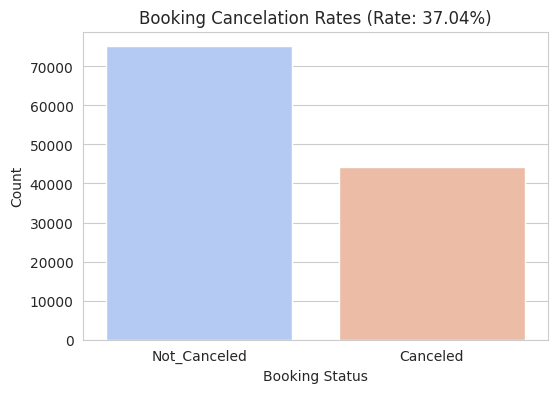

In [10]:
#Calculating the percentage of cancelations to better identify the scope of the issue.
cancelation_rate = data_df['is_canceled'].mean() * 100
print(cancelation_rate)
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='is_canceled', data=data_df, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Not_Canceled', 'Canceled'])
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.title(f"Booking Cancelation Rates (Rate: {cancelation_rate:.2f}%)")
plt.show

**Discussion:**
Note that there are some suspicious values above.  These may be data quality issues.  Suggestions:
- Please fill in a response...

Since the goal is to determine the best way to reduce cancellations, it was essential to first understand the scope of canceled reservations. This required analyzing the percentage of total reservations that were canceled. The cancellation ratio will be a key metric when implementing solutions. Given that the solution only needs to be directionally correct, establishing a baseline ratio and a target reduction (e.g., 25%) will help in identifying the most relevant data.



hotel
City Hotel      41.726963
Resort Hotel    27.760859
Name: is_canceled, dtype: float64
Chi-Square p-value: 0.00000


<ipython-input-11-578d3f3e28a3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancellation_by_hotel.index, y=cancellation_by_hotel.values, palette='coolwarm')


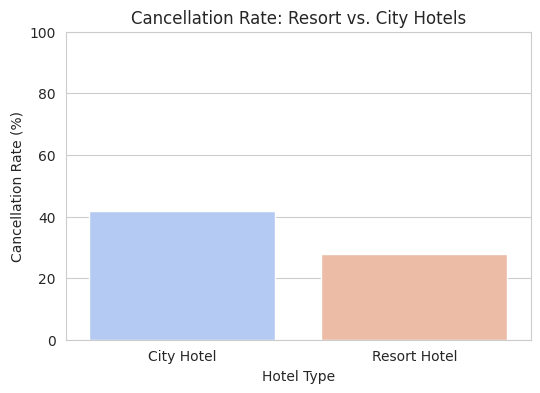

In [ ]:
cancellation_by_hotel = data_df.groupby('hotel')['is_canceled'].mean() * 100
print(cancellation_by_hotel)

plt.figure(figsize=(6, 4))
sns.barplot(x=cancellation_by_hotel.index, y=cancellation_by_hotel.values, palette='coolwarm')
plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate: Resort vs. City Hotels")
plt.ylim(0, 100)


plt.show

#Chi-Square Test to determing statistical significance bewteen the two hotel categories cancellation.
chi_test = pd.crosstab(data_df['hotel'], data_df['is_canceled'])

chi2, p, dof, expected = chi2_contingency(chi_test)
print(f"Chi-Square p-value: {p:.5f}")


To better understand the cancellation ratio, it is important to compare cancellation rates between city and resort hotels. The data suggests that city hotels have a higher cancellation rate than resort hotels (41% compared to 27%). Could this indicate an inherent difference in guest behavior between the two hotel types?

A Chi-Squared test between the 'hotel' and 'is_canceled' variables shows a statistically significant relationship, with a p-value of 0.000. This reinforces the observed difference in cancellation rates between city and resort hotels.


<ipython-input-12-9dfb1f6db511>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='lead_time', data=data_df, palette='coolwarm')


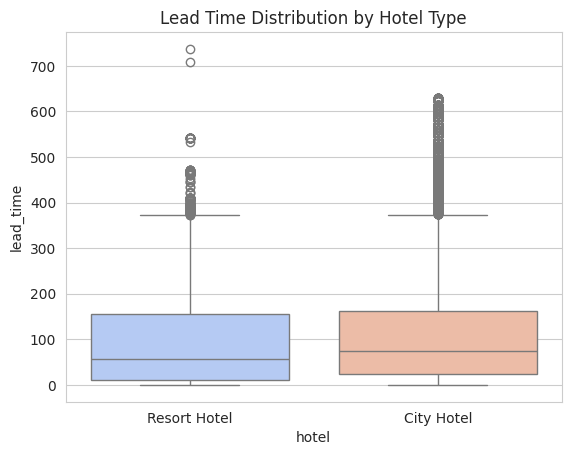

In [ ]:
#Checking lead time for hotel types to determine if this accounts for the difference.
#Longer lead times may imply more speculautive bookings.
sns.boxplot(x='hotel', y='lead_time', data=data_df, palette='coolwarm')
plt.title("Lead Time Distribution by Hotel Type")
plt.show()

The data reveals a slight difference in lead time between city and resort hotels, with city hotels having a higher mean lead time. Interestingly, the maximum lead time of 737 days falls under the resort hotel category. If lead time has a correlation with cancellation rate, it will be important to review for each type of hotel.

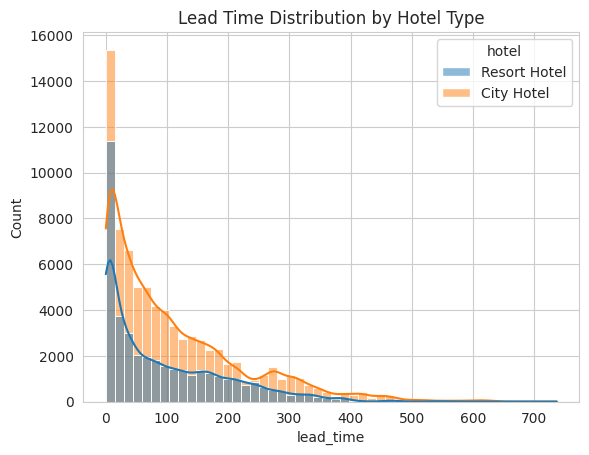

Levene's Test p-value: 0.00000
Mann-Whitney U Test p-value: 0.00000


In [ ]:
#Checking for normal distribution of the data in irder to perporm the correct test.
sns.histplot(data=data_df, x="lead_time", hue="hotel", kde=True, bins=50)
plt.title("Lead Time Distribution by Hotel Type")
plt.show()


from scipy.stats import mannwhitneyu
from scipy.stats import levene
#Lead time by hotel was not normally distributed, checking the varience.

lead_time_resort = data_df[data_df['hotel'] == 'Resort Hotel']['lead_time']
lead_time_city = data_df[data_df['hotel'] == 'City Hotel']['lead_time']

levene_stat, levene_p = levene(lead_time_resort, lead_time_city)
print(f"Levene's Test p-value: {levene_p:.5f}")
#Varience p-value is 0.000, which is less than 0.05.

#Mann-Whitney test because data is not normally distrinuted and the is not either.
mw_stat, mw_p = mannwhitneyu(lead_time_resort, lead_time_city, alternative='two-sided')
print(f"Mann-Whitney U Test p-value: {mw_p:.5f}")
#p-value=0.00000


In order to confirm statistical significance between lead time and hotel types, the initial task was to perform an ANOVA test, however, when looking at the shape of the data, it was not noramlly distributed. As a result, the Mann-Whitney test was used to identify and reinforce the influence of lead time on hotel type.

In [ ]:
#Checking cancellations by deposite type and by hotel type.
cancellation_by_deposit = data_df.groupby(['hotel', 'deposit_type'])['is_canceled'].mean() * 100
print(cancellation_by_deposit.max())
print(data_df['is_canceled'].unique())
print(data_df.duplicated().sum())
print(data_df.groupby(['hotel', 'deposit_type'])['is_canceled'].count())
print(cancellation_by_deposit)

99.81349082996582
[ 0.  1. nan]
1
hotel         deposit_type
City Hotel    No Deposit      66442
              Non Refund      12868
              Refundable         20
Resort Hotel  No Deposit      38199
              Non Refund       1719
              Refundable        142
Name: is_canceled, dtype: int64
hotel         deposit_type
City Hotel    No Deposit      30.468679
              Non Refund      99.813491
              Refundable      70.000000
Resort Hotel  No Deposit      24.736250
              Non Refund      95.986038
              Refundable      15.492958
Name: is_canceled, dtype: float64


Because there is a differnce cancellation rates between city nd resort hotels, investigating the the deposite types based on hotel types. Providing counts and rate of cancellation based on hotel types. No deposit had the highest number  in both hotel types, but the lowest percentage of cancellations.

In [ ]:
#Checking to determine whether previous cancellations impact cancellation rates.
cancellation_by_previous = (data_df.groupby(['hotel', 'previous_cancellations'])['is_canceled'].mean() * 100).reset_index()
print(cancellation_by_previous)


           hotel  previous_cancellations  is_canceled
0     City Hotel                       0    37.981634
1     City Hotel                       1    96.294859
2     City Hotel                       2    18.055556
3     City Hotel                       3    13.725490
4     City Hotel                       4    16.000000
5     City Hotel                       5     6.250000
6     City Hotel                       6    31.818182
7     City Hotel                      11    28.571429
8     City Hotel                      13    91.666667
9     City Hotel                      21   100.000000
10  Resort Hotel                       0    26.169639
11  Resort Hotel                       1    83.705357
12  Resort Hotel                       2    56.818182
13  Resort Hotel                       3    92.857143
14  Resort Hotel                       4    50.000000
15  Resort Hotel                       5    33.333333
16  Resort Hotel                      14   100.000000
17  Resort Hotel            

The data does show that when previous cancellations are ≥13, cancellation rates are consistently high (91.67% - 100%). This suggests a strong relationship between prior cancellations and the likelihood of future cancellations. Yet, the data also suggests that high cancellation rates exist at lower number of previous cancellations. This suggests that there are other factors influencing cancellation rates.



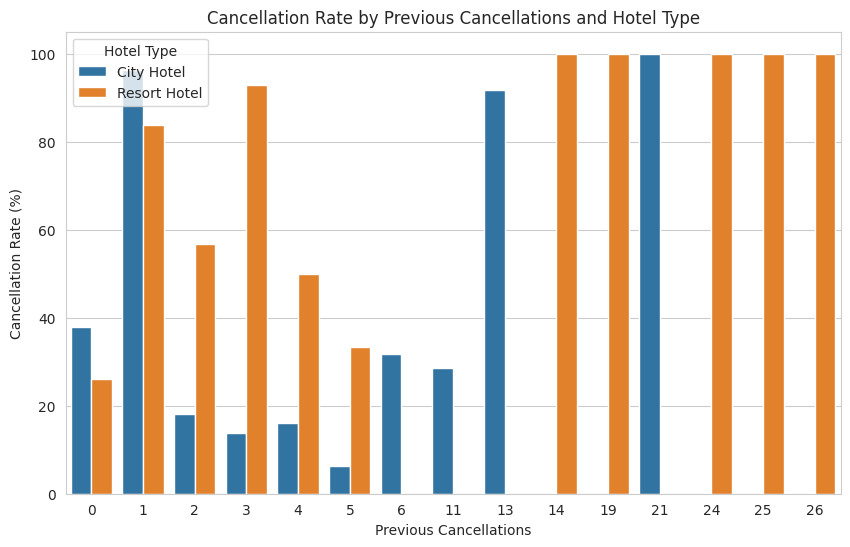

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cancellation_by_previous, x='previous_cancellations', y='is_canceled', hue='hotel')
plt.xlabel("Previous Cancellations")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Previous Cancellations and Hotel Type")
plt.legend(title="Hotel Type")
plt.show()

Barchart that emphasizes high cancellation rate at high numbers of previous cancellations, but also at lower numbers as well.

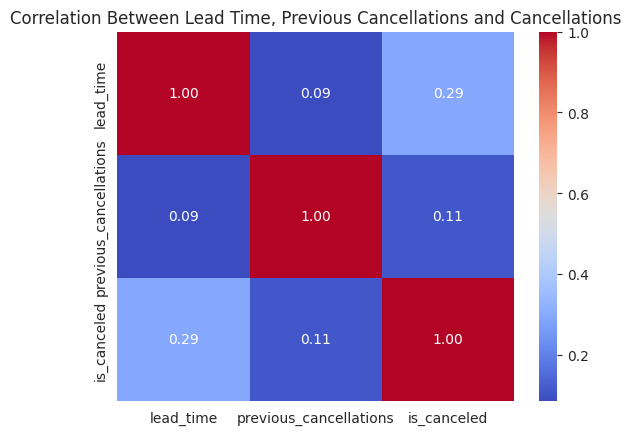

In [ ]:
#Checking Lead time as a factor in previous cancellations and cancellations
lead_time_matrix = data_df[['lead_time', 'previous_cancellations', 'is_canceled']].corr()
sns.heatmap(lead_time_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Lead Time, Previous Cancellations and Cancellations")
plt.show()

The correlation heatmap details that the relationship between lead time and cancellation has a positive correlation (0.29). Yet the correlation between previous cancellations and cancellations have a weaker correlation (0.11). The weakest correlaion was lead time and previous cancellation (0.09).

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### **Missing Attribute Values**

In [ ]:
# Count the missing values for the entire dataframe.
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()

print("Total Records:", data_df.shape[0], "- Number of Records with NA:", num_records_with_na, "- Number of NA Values:", num_na_values)

# Display the first 10 rows with missing values.
na_df.head(10)

# Show the missing values for each attribute.
print("\nNA Values per Attribute:")
for att in data_df.columns:
    num_na = data_df[att].isna().sum()
    if num_na > 0:
        print(att, num_na)

Total Records: 119391 - Number of Records with NA: 119174 - Number of NA Values: 129427

NA Values per Attribute:
is_canceled 1
children 4
country 488
agent 16340
company 112594


**Discussion:**
Suggested actions:

The dataset has several missing values, with 119,174 rows (99.8%) missing at least one attribute. Most rows (91%) are missing only one value, and most of these come from two columns: "company" (94% missing) and "agent" (14% missing). While "is_canceled", "children", and "country" also have missing values, the proportion missing for each of these attributes is less than 1%.

Suggested Actions:
*   DROP "company" completely from the dataset since nearly every row has missing data related to this attribute.

*   DROP the one record that is missing data for "is_canceled". This attribute is crucial to a predictive model, so a record with no data for this attribute has little value. Since there is only one record missing this attribute, dropping it is the most efficient and least complicated solution.

*   REPLACE the 16,340 missing values in the "agent" column with "No Agent", thereby assuming omissions simply indicate no agents were involved.

*   REPLACE the 4 missing values in the "childern" column with 0, thereby assuming omissions simply indicate no children.

*   For now, REPLACE the 488 missing values in the "country" column with "No Country Specified". If doing so complicates predictive modeling later in the project, consider either dropping the attribute altogether, or dropping the 488 entries that have no country data.

### **Duplicate Records**

In [ ]:
# Find duplicate records across all attributes.
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 1


,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
6,5,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


**Discussion:**
Suggested actions:

The dataset contains only one duplicate record - a Resort Hotel reservation with the same details across all attributes. This confirms that duplicate entries are not a significant issue in this dataset.

Suggested Action:
*   DROP the duplicate record from the dataset.

### **Outliers**
- There are many ways to discover and handle outliers, and many resources online.  Here is a nice discussion:
- https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [ ]:
# Use the IQR method to detect all attributes in the dataset that have outliers.
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Limit the results to just numerical attributes and print a summary.
for col in data_df.select_dtypes(include=['int64', 'float64']).columns:
    print(f"{col}: {count_outliers_iqr(data_df, col)} outliers")

ROW: 0 outliers
is_canceled: 0 outliers
lead_time: 3005 outliers
arrival_date_year: 0 outliers
arrival_date_week_number: 0 outliers
arrival_date_day_of_month: 0 outliers
stays_in_weekend_nights: 265 outliers
stays_in_week_nights: 3354 outliers
adults: 29711 outliers
children: 8590 outliers
babies: 917 outliers
is_repeated_guest: 3810 outliers
previous_cancellations: 6484 outliers
previous_bookings_not_canceled: 3620 outliers
booking_changes: 18076 outliers
agent: 0 outliers
company: 0 outliers
days_in_waiting_list: 3698 outliers
adr: 3793 outliers
required_car_parking_spaces: 7416 outliers
total_of_special_requests: 2877 outliers


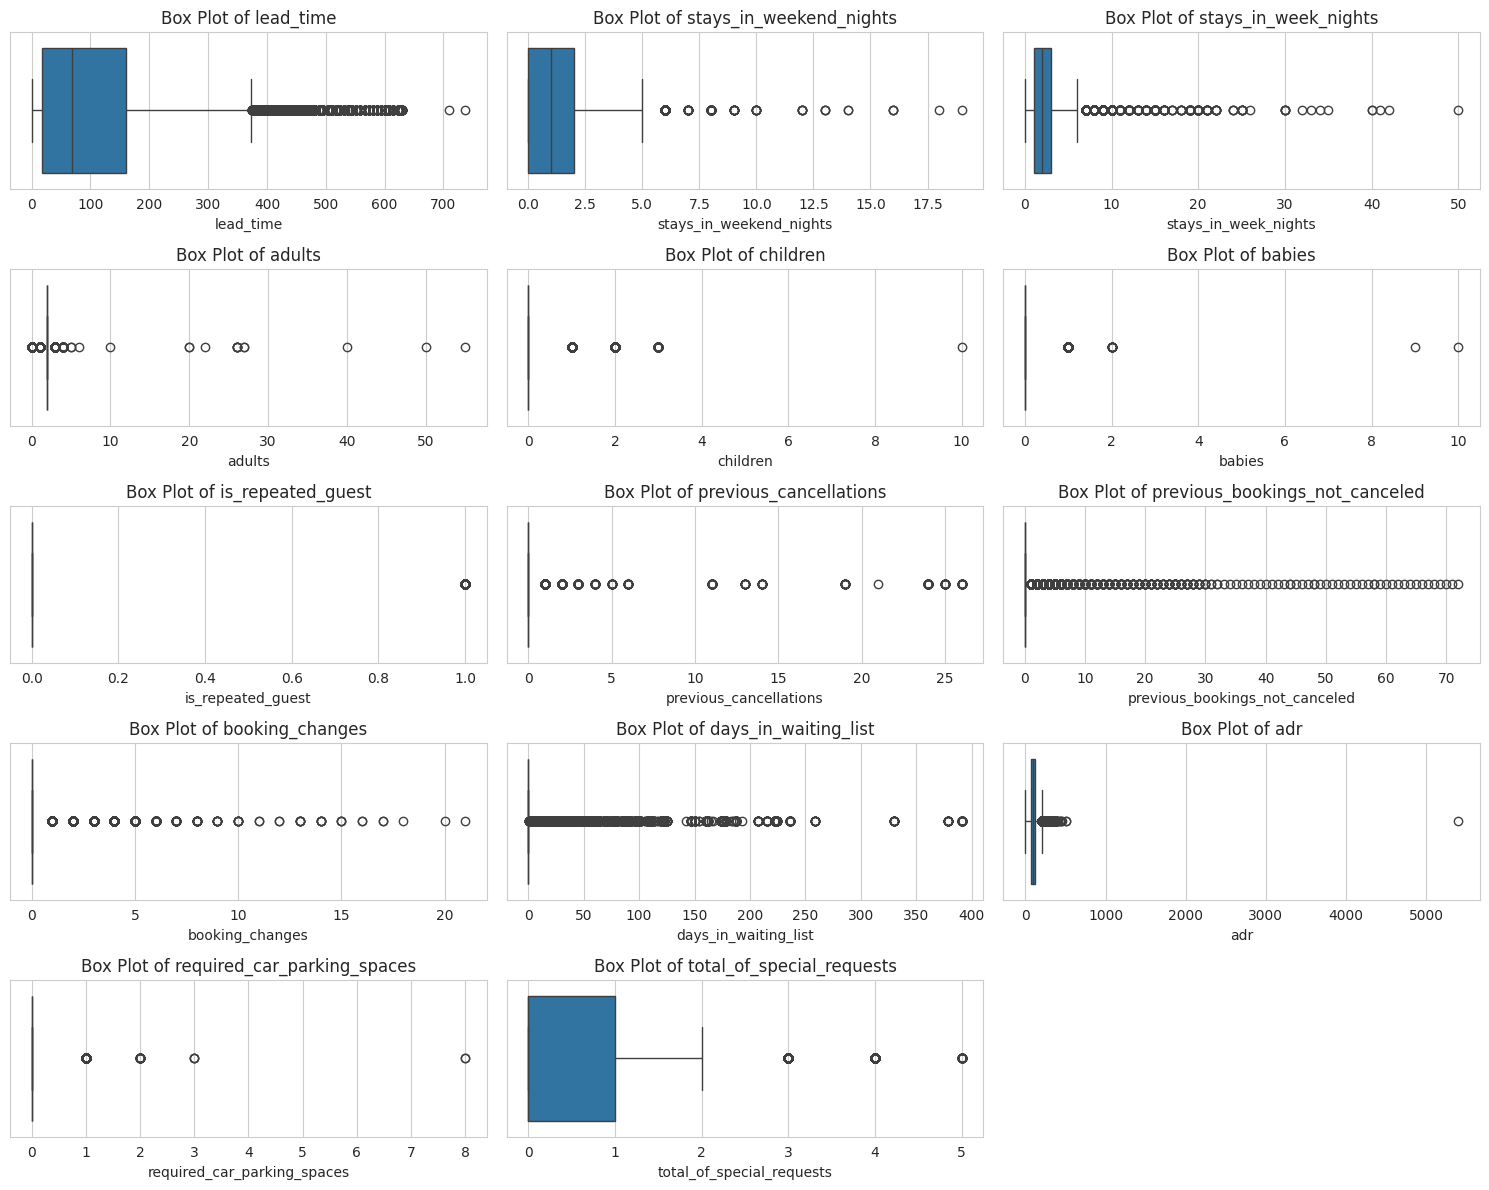

In [ ]:
# Create a list of the 14 numerical attributes that have outliers.
numeric_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                'adults', 'children', 'babies', 'is_repeated_guest',
                'previous_cancellations', 'previous_bookings_not_canceled',
                'booking_changes', 'days_in_waiting_list', 'adr',
                'required_car_parking_spaces', 'total_of_special_requests']

# Create box plots for all 14 attributes with outliers.
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 3, i)  # Adjust grid layout
    sns.boxplot(x=data_df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

**Discussion:**
Suggested actions:

The dataset contains several numerical attributes with significant outliers, as shown in the box plots. However, not all outliers require the same level of attention. Some extreme values may reflect errors or rare cases that should be validated, while others appear as expected variations that may not impact modeling significantly.

**High-priority attributes with outliers that may need adjusting:**

These attributes contain extreme outliers that could distort analysis and should be carefully examined in the Data Preparation phase:

* "adr" (average daily rate) - Outliers exceed $5,000, which may indicate data entry errors or rare luxury bookings.

* "lead_time" - Some bookings were made 700+ days in advance, which might be valid but should be reviewed for consistency.

* "stays_in_week_nights" and "stays_in_weekend_nights" - Several bookings show stays longer than 40+ nights, which could be long-term stays, special cases, or errors.

* "days_in_waiting_list" - Some cases exceed 300+ days, which may be due to system errors or unusually high-demand periods.

* "previous_cancellations", "previous_bookings_not_canceled", and "booking_changes" - Some values are very high (e.g., 70+ previous bookings, 25+ cancellations, or 20+ booking changes), which could reflect data inconsistencies or specific customer behavior worth analyzing.

**Lower-priority attributes with outliers that may not need adjustments**

* "adults", "children", and "babies" - The IQR method flagged almost all non-zero values as outliers, but large family or group bookings might be expected in a hotel dataset. These should remain as they are unless further investigation suggests unrealistic entries (e.g., adults > 50).

* "is_repeated_guest" - This is a binary value (0/1), so the IQR method for flagging outliers may not be a good fit for this attribute. This attribute should remain as it is.

* "required_car_parking_spaces" - Some bookings have high parking requests (e.g., 8 spaces), but this could be legitimate for large groups or conference events. This attribute should remain as it is.

* "total_of_special_requests" - Bookings with 5+ requests may be rare but aren't necessarily incorrect. This attribute should remain as it is.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
***

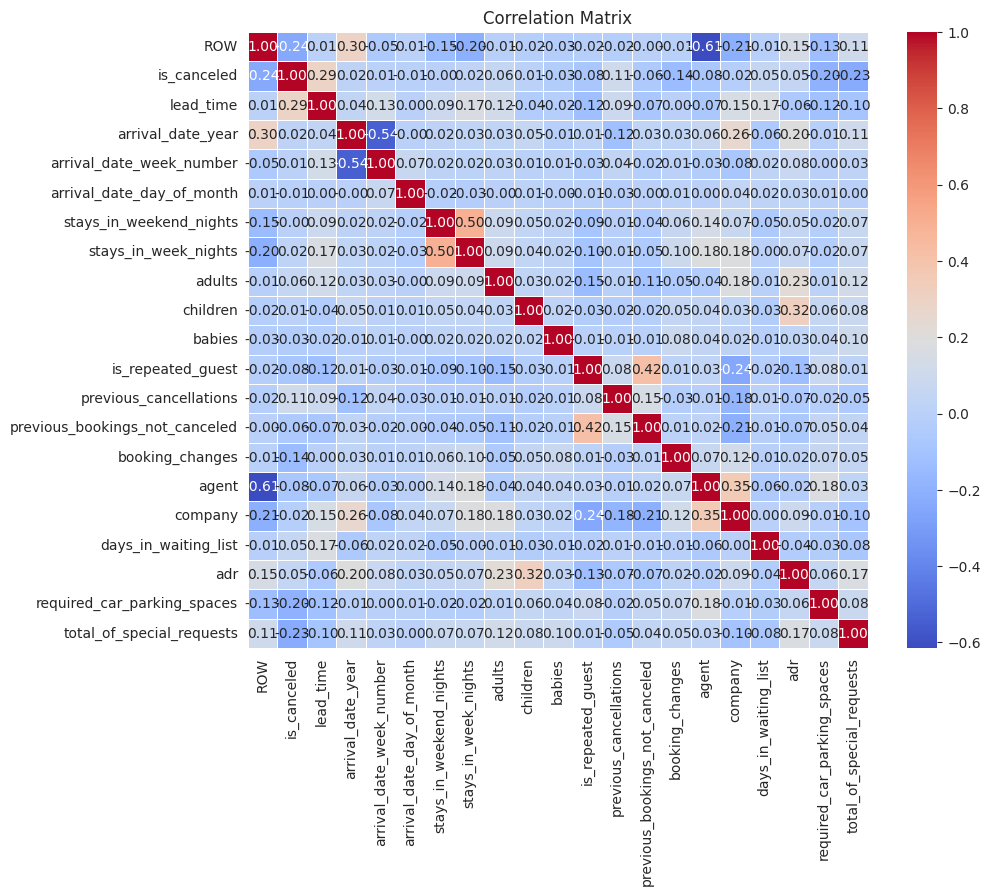

In [ ]:
# Create a correlation matrix to identify correlations between variables
# Encode categorical variables into numeric values
data_df_copy = data_df
data_df_copy_encoded = pd.get_dummies(data_df_copy, columns=['hotel'], drop_first=True)

# Select only numeric columns
numeric_data = data_df_copy_encoded.select_dtypes(include=['number'])

# Create correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Discussion** The correlation matrix highlights a weak positive correlation between lead time and is_canceled that could be relevant to our business question. There are also weak negative correlations between is_cancelled and required parking spaces and special requests that could be explored further. The matrix also highlights some more obvious correlations, such as the number of room occupants (adults, children) and the average daily rate. Daily rates typically increase as the number of occupants increase, so that correlation does not require additional review.

### **Categorical Attribute vs Categorical Attribute**

market_segment  Aviation  Complementary  Corporate  Direct  Groups  \
hotel                                                                
City Hotel           237            542       2986    6093   13975   
Resort Hotel           0            201       2309    6513    5836   

market_segment  Offline TA/TO  Onlin TA  Online TA  Undefined  
hotel                                                          
City Hotel              16747         0      38748          2  
Resort Hotel             7472         1      17729          0  


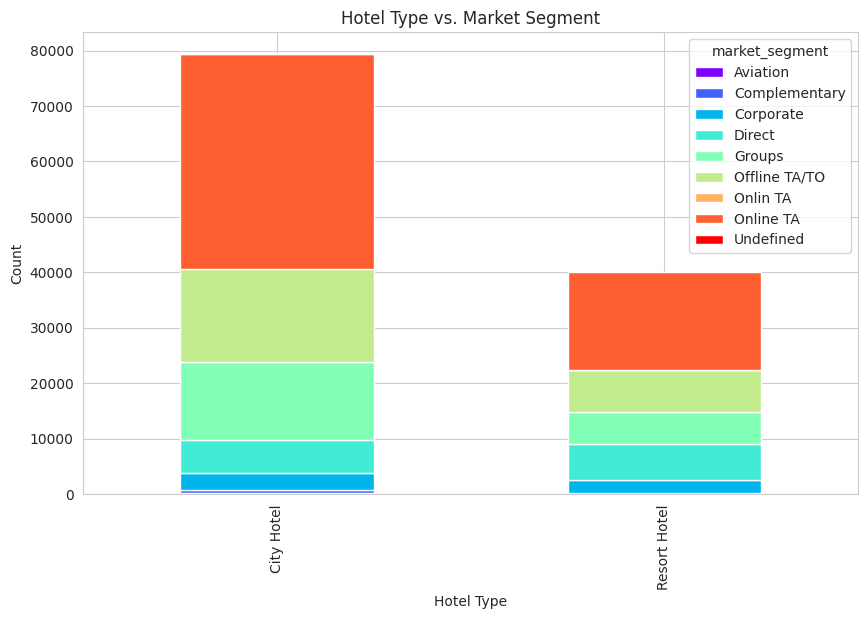

In [ ]:
# visualize the breakdown of market segments (categorical) for each hotel type (categorical)
# create a copy of data_df
data_df_copy = data_df.copy()

# Cross-tabulation between hotel type and market segment
cross_tab = pd.crosstab(data_df_copy['hotel'], data_df_copy['market_segment'])
print(cross_tab)

# Plot the cross-tabulation in a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='rainbow')
plt.title('Hotel Type vs. Market Segment')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

**Discussion:**
This visualization shows that there are significantly more city hotels than resort hotels in the booking data. It also shows the breakdown of market segments at each of the two hotel types. The stacked bar chart shows that the proportion of market segments represented in the data is similar at each of the hotel types - bookings via online travel agent are the largest market segment, followed by offline travel agents and tour operators.

### **Categorical Attribute vs Numerical Attribute**

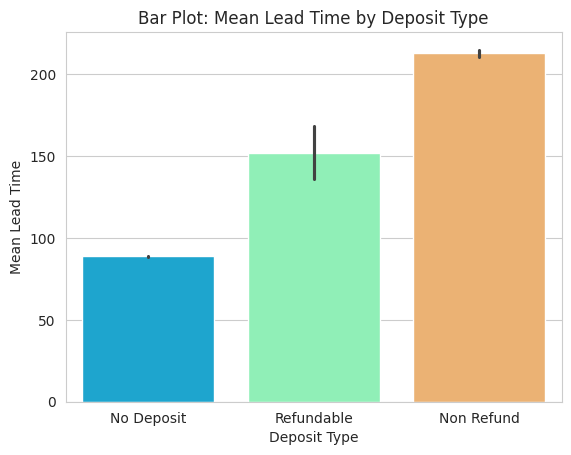

In [ ]:
# Plot mean 'lead_time' (numerical) across 'deposit_type' (categorical)
# Create bar plot
sns.barplot(x='deposit_type', y='lead_time', data=data_df_copy, estimator=np.mean, hue='deposit_type', palette='rainbow', legend=False)
plt.title('Bar Plot: Mean Lead Time by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Mean Lead Time')
plt.show()

**Discussion:**
I was interested in a whether there was a relationship between the lead time and the deposit type. For example, would someone who plans a trip far in advance be more or less likely to pay a deposit? The plot shows that the average lead time for a booking with no deposit is shorter than the average lead time for a booking made with a deposit, regardless of whether the deposit was for the total cost of the stay (Non Refund) or the partial cost of the stay (Refundable).

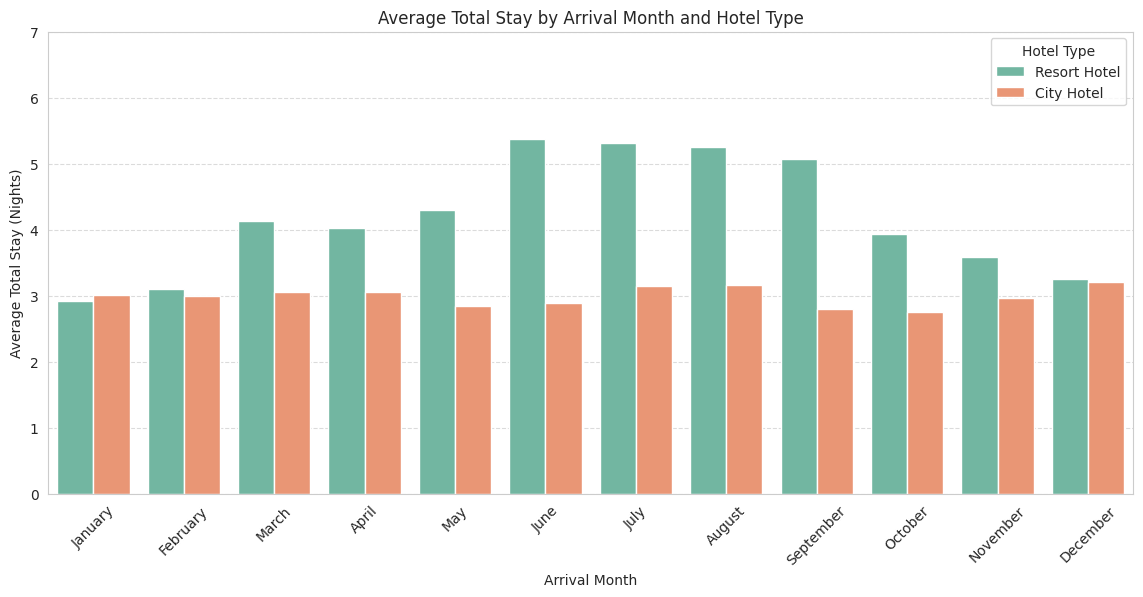

In [ ]:
# Plot total stay duration (numerical) by arrival month (categorical) and hotel type (categorical)
# Calculate total stay duration (weekend + week nights)
data_df_copy['total_stay_duration'] = data_df_copy['stays_in_week_nights'] + data_df_copy['stays_in_weekend_nights']

# Define the correct order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert arrival_date_month to a categorical variable with the correct month order
data_df_copy['arrival_date_month'] = pd.Categorical(data_df_copy['arrival_date_month'], categories=month_order, ordered=True)

# Create a bar plot with hotel type comparison
plt.figure(figsize=(14, 6))
sns.barplot(
    x='arrival_date_month',
    y='total_stay_duration',
    hue='hotel',
    data=data_df_copy,
    errorbar=None,
    palette='Set2')

plt.title('Average Total Stay by Arrival Month and Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Average Total Stay (Nights)')
plt.xticks(rotation=45)
plt.ylim(0, 7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Hotel Type', loc='upper right')
plt.show()

**Discussion:** This plot explores differences in the average total length of stay (week nights + weekend nights) by month and hotel type. I was interested in the impact that time of year and destination may have on the average length of stay. The plot shows that the total length of stay for city hotels remains consistent throughout the year at around 3 nights. The average length of stay at resort hotels is longer than at city hotels throughout the year. Average stays at resort hotels are longer during the warmer summer months.   

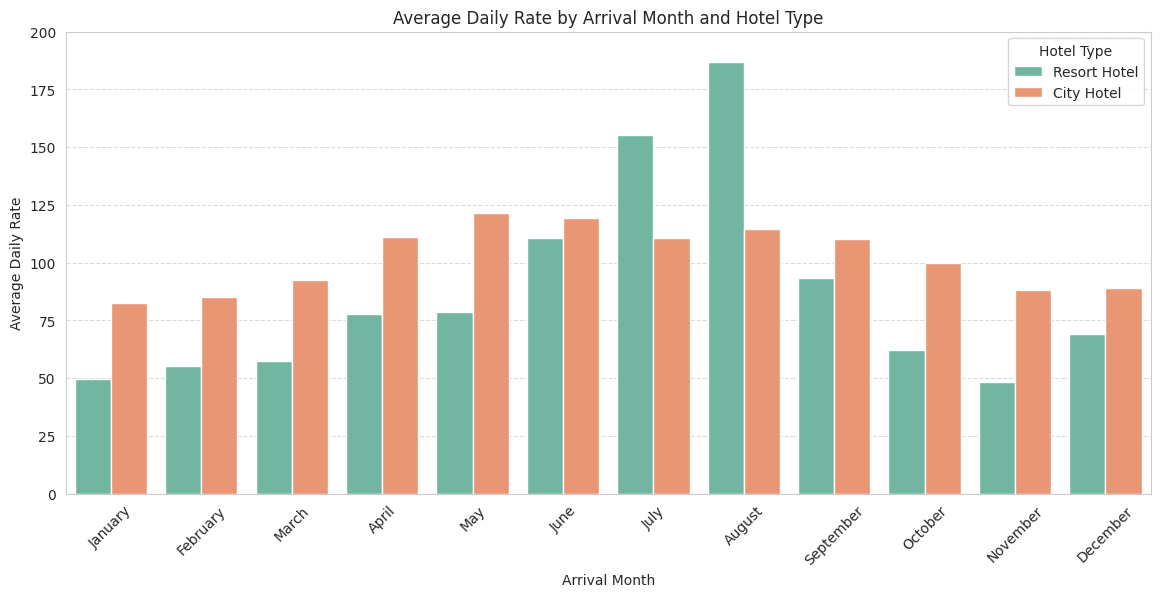

In [ ]:
# Compare ADR (numerical by arrival month (categorical) and hotel type (categorical)

# Create a bar plot with hotel type comparison
plt.figure(figsize=(14, 6))
sns.barplot(
    x='arrival_date_month',
    y='adr',
    hue='hotel',
    data= data_df_copy,
    errorbar=None,
    palette='Set2'
)

plt.title('Average Daily Rate by Arrival Month and Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate')
plt.xticks(rotation=45)
plt.ylim(0, 200)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Hotel Type', loc='upper right')
plt.show()

**Discussion:** This plot continues to explore trends by month. I was interested in whether the arrival month would impact the average daily rate (ADR) and whether there were differences in ADR by destination (city v. resort). The plot shows that ADR increases for both destinations during popular summer travel months. The summer ADR increase is more significant at the resort hotels than at the city hotels.

<ipython-input-27-267965534562>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = data_df_copy.groupby("arrival_date_month")["lead_time"].mean()


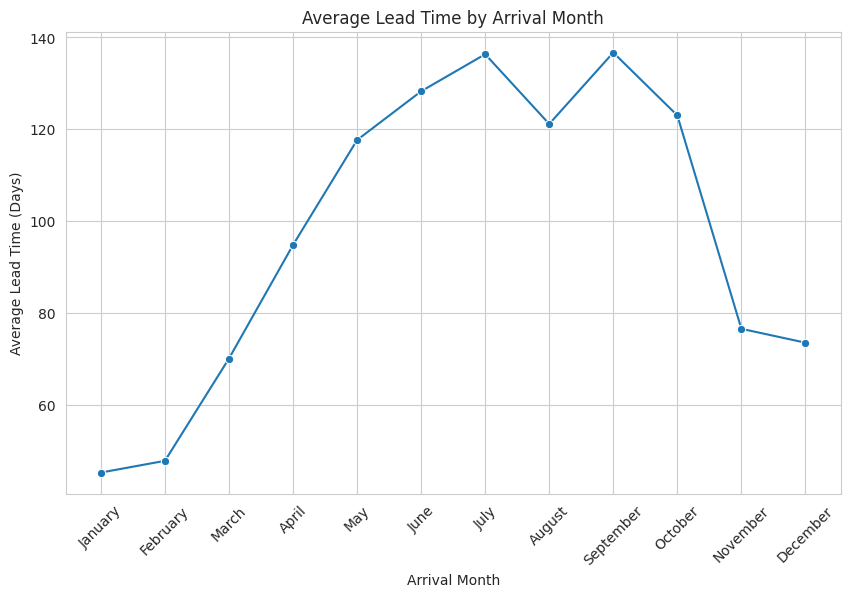

In [ ]:
# Compare the average lead time (numerical) v. arrival month (categorical)
# Calculate the average lead_time grouped by month
monthly_avg = data_df_copy.groupby("arrival_date_month")["lead_time"].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker="o", linestyle="-")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Customize the plot
plt.title("Average Lead Time by Arrival Month")
plt.xlabel("Arrival Month")
plt.ylabel("Average Lead Time (Days)")

# Show the plot
plt.show()

**Discussion:** I continued to explore monthly/seasonal trends by plotting average lead time by month. Lead time peaked in the summer months, indicating that summer trips were generally planned and booked in the winter months. Winter trips were generally booked with much less lead time - in Janauary and February, lead time was less than 30 days.

### **Numerical Attribute vs Numerical Attribute**

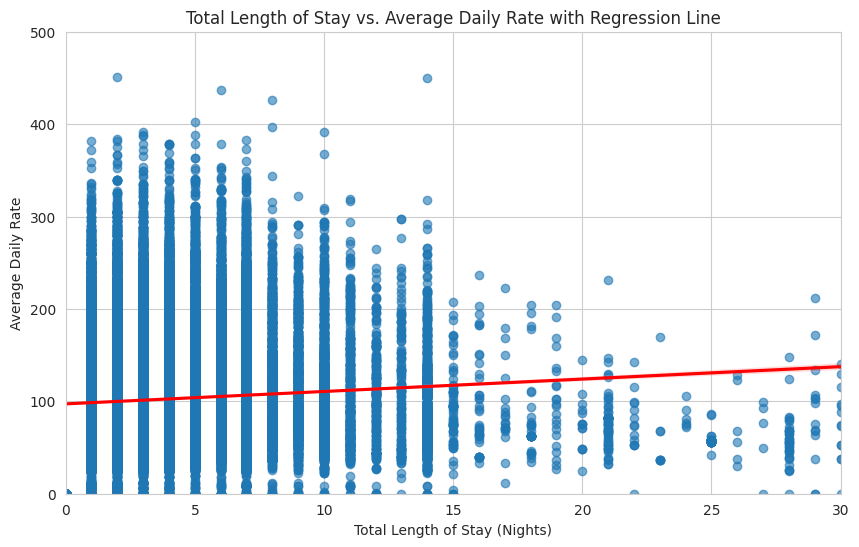

In [ ]:
# Plot the total length of stay (numerical) v. average daily rate (numerical)
# Create scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data_df_copy, x='total_stay_duration', y='adr', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Total Length of Stay vs. Average Daily Rate with Regression Line')
plt.xlabel('Total Length of Stay (Nights)')
plt.ylabel('Average Daily Rate')
plt.ylim(0, 500)  # Set y-axis limit to ignore outlier for now
plt.xlim(0, 30)
plt.show()

**Discussion:** This visualization explores the relationship between the total length of the hotel stay (week nights + weekend nights) and the average daily rate (ADR) for the booking. I was interested to see whether a longer length of stay would reduce the ADR. The plot shows that the ADR widely varies for any length of stay. The regression line indicates that predicted daily rates actually tend to increase as the length of stay increases.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

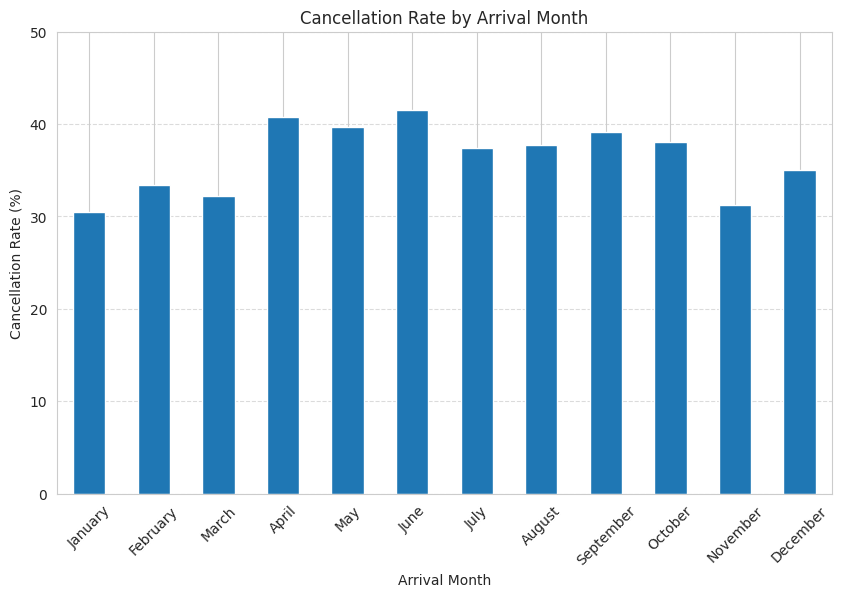

In [ ]:
# compare cancellation rate (numerical) and arrival month (categorical)

# Calculate average cancellation rate for each arrival month
cancellation_rate = data_df_copy.groupby('arrival_date_month', observed=False)['is_canceled'].mean() * 100

# Reindex the cancellation_rate Series to match the month order
cancellation_rate = cancellation_rate.reindex(month_order)

# Create a bar plot of average cancellation rate by month
plt.figure(figsize=(10, 6))
cancellation_rate.plot(kind='bar')
plt.title('Cancellation Rate by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 50)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Discussion:** I was interested in learning whether some months had higher cancellation rates than others. For example, maybe winter weather would impact travel in the winter months, leading to more cancellations. The visualization actually shows lower cancellation rates in January, February, and March, so winter weather does not appear to increase cancellation rates. The plot shows that cancellations are generally around 30% in the winter months and around 40% in the warmer months.  

<Figure size 1200x600 with 0 Axes>

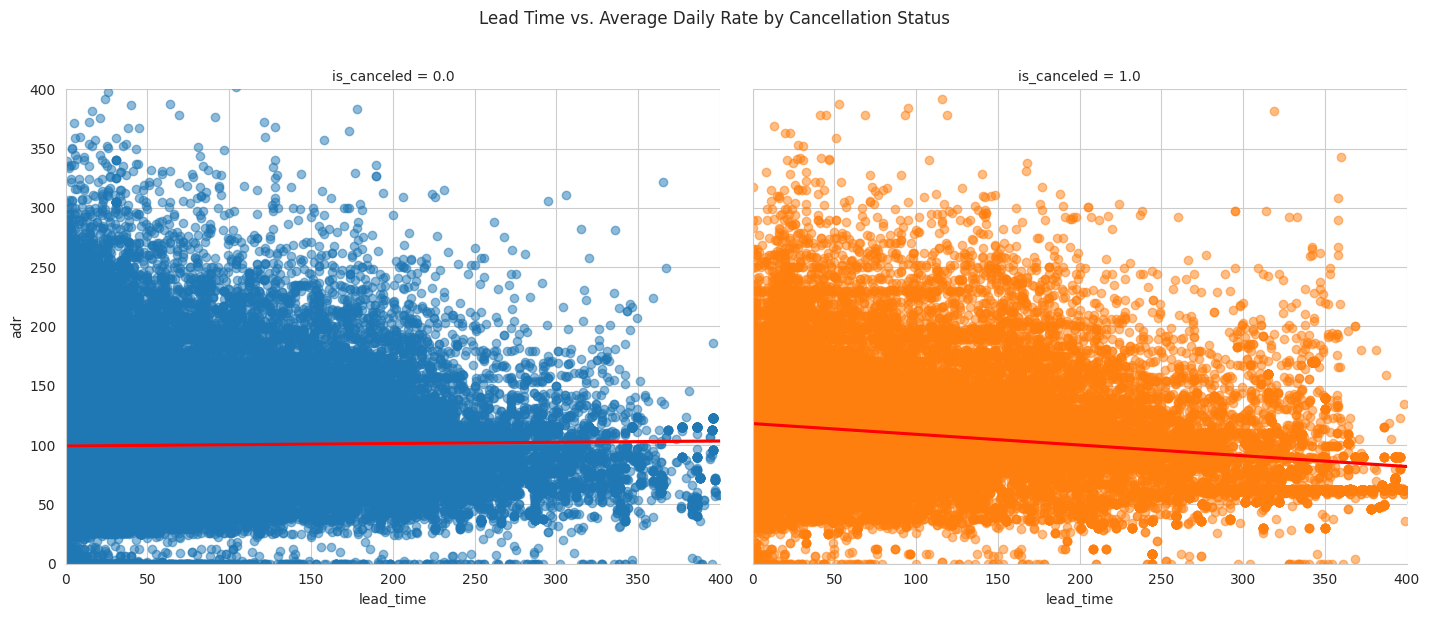

In [ ]:
# Create a faceted scatter plot of lead time v. adr with regression lines, separated by is_canceled
plt.figure(figsize=(12, 6))
sns.lmplot(
    x='lead_time',
    y='adr',
    data=data_df_copy,
    hue='is_canceled',
    col='is_canceled',  # Separate into columns based on is_canceled
    scatter_kws={'alpha': 0.5},
    height=6,
    aspect=1.2,
    line_kws={'color': 'red'}
)

plt.suptitle('Lead Time vs. Average Daily Rate by Cancellation Status', y=1.02)
plt.ylim(0, 400)  # Set limits to ignore extreme values for now
plt.xlim(0, 400)
plt.tight_layout()
plt.show()

**Discussion:** This plot looks at the relationship between lead time and average daily rate and separates the data into cancelled and non-cancelled bookings. I was interested in whether lead time impacted the average daily rate and whether there was an obvious difference between cancelled and non-cancelled bokings. The scatterplots of cancelled and non-cancelled bookings are very similar, indicating similar data in both groups. ADR varied widely in both groups, with slightly less variation as lead time increased. The regression line indicates that the predicted ADR decreases slightly for cancelled bookings as lead time increases. These plots do not show a clear relationship between ADR/lead time and cancellation status.

<ipython-input-31-49bf1c1bff58>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="is_canceled", y="lead_time", data=data_df_copy, palette="rainbow")


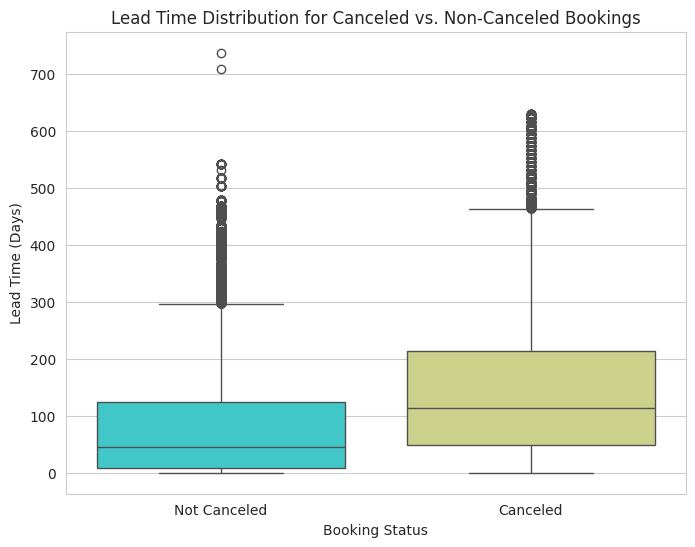

In [ ]:
# Compare lead time to cancellation status
# create box plots of lead time for cancelled and non-cancelled bookings
plt.figure(figsize=(8, 6))
sns.boxplot(x="is_canceled", y="lead_time", data=data_df_copy, palette="rainbow")

plt.xticks([0, 1], ["Not Canceled", "Canceled"])
plt.title("Lead Time Distribution for Canceled vs. Non-Canceled Bookings")
plt.xlabel("Booking Status")
plt.ylabel("Lead Time (Days)")

plt.show()

**Discussion:** This plot more directly explores the relationship between cancellation and lead time. The plot shows that the median lead time of cancelled bookings is higher than the median lead time of not-cancelled bookings, and there is greater variation in lead time of cancelled bookings. The whiskers indicate a wider range of lead times in the cancelled bookings. Overall, the plot suggests that non-cancelled bookings generally tend to have lead times of less than 150 days.

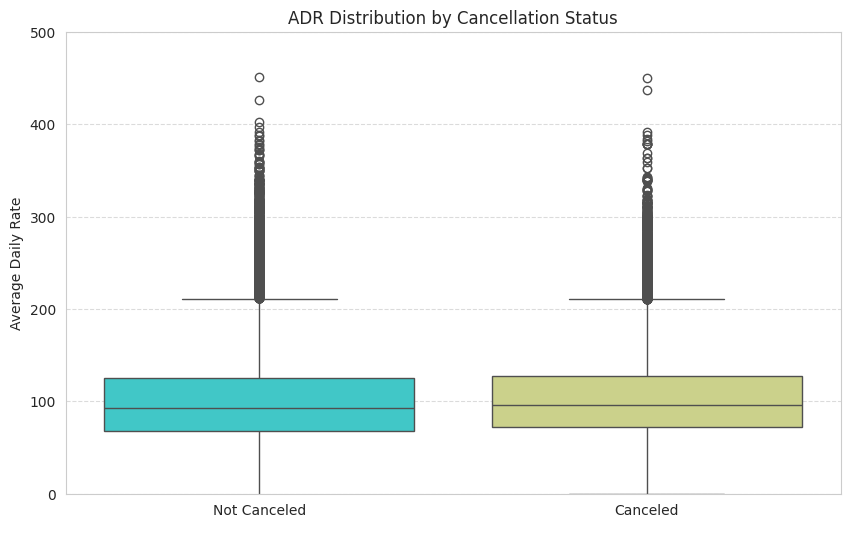

In [ ]:
# Compare ADR (numerical) to cancellation status (categorical)
# Filter out rows with missing ADR values for now
data_df_copy = data_df_copy.dropna(subset=['adr'])

# Create box plots of ADRS for each cancellation status
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='is_canceled',
    y='adr',
    data=data_df_copy,
    hue='is_canceled',
    palette='rainbow',
    legend=False
)
plt.title('ADR Distribution by Cancellation Status')
plt.ylabel('Average Daily Rate')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylim(0, 500)  # Ignore extreme outliers for now
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Discussion:** This plot more directly explores the relationship between cancellation and ADR. The plot shows that the median lead time of cancelled bookings non-cancelled bookings is almost identical. The variations and ranges of cancelled and non-cancelled bookings are also very similar. Overall, the plot shows that there are no significant differences in the average daily rates for cancelled and non-cancelled bookings.

required_car_parking_spaces      0     1   2  3  8
is_canceled                                       
0.0                          67751  7383  28  3  2
1.0                          44223     0   0  0  0


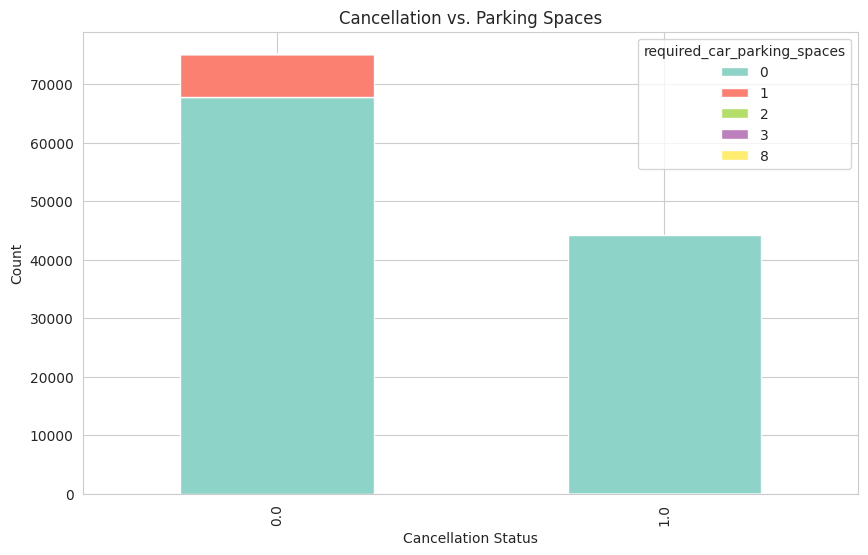

In [ ]:
# look at relationship between required parking spaces and is_canceled
# Cross-tabulation between cancellation and parking requests
cross_tab = pd.crosstab(data_df_copy['is_canceled'], data_df_copy['required_car_parking_spaces'])
print(cross_tab)

# Plot the cross-tabulation in a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Cancellation vs. Parking Spaces')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

**Discussion** The correlation matrix had indicated a weak positive correlation between required parking spaces and is_canceled, so I wanted to visualize the relationship. The cross tab and bar plot show that the overall number of bookings that required at least one parking space is small - about 6.2% of total bookings. Although the number of parking space requests is small, it is notable that none of those bookings were canceled. The fact that zero of parking request bookings were cancelled causes me to question the accuracy of that data field.

total_of_special_requests      0      1      2     3    4   5
is_canceled                                                  
0.0                        36762  25909  10103  2051  304  38
1.0                        33555   7318   2866   446   36   2


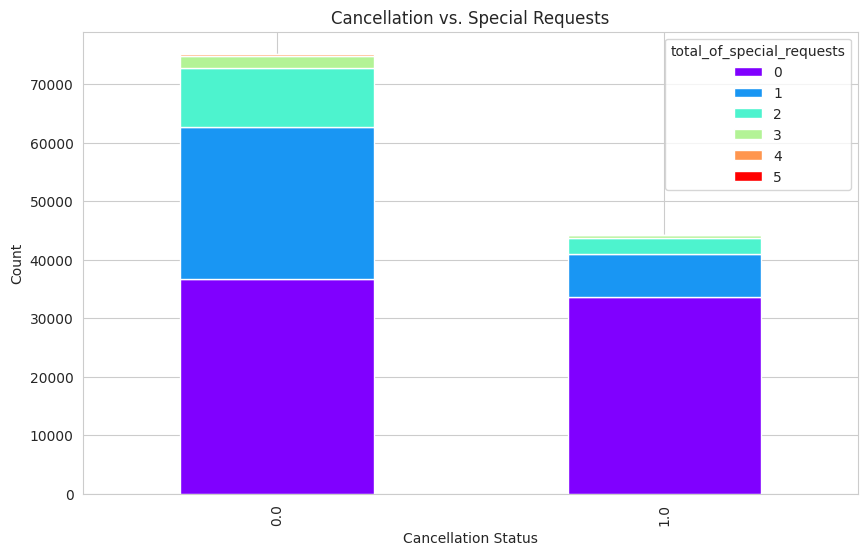

In [ ]:
# look at relationship between special requests and cancellations
# Cross-tabulation between cancellation and special requests
cross_tab = pd.crosstab(data_df_copy['is_canceled'], data_df_copy['total_of_special_requests'])
print(cross_tab)

# Plot the cross-tabulation in a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='rainbow')
plt.title('Cancellation vs. Special Requests')
plt.xlabel('Cancellation Status')
plt.ylabel('Count')
plt.show()

**Discussion** The correlation matrix indicated a weak positive correlation between cancellation status and special requests. The cross tab and stacked bar plot show that about 50% of bookings included at least one special request. If the bookings included at least one special request, guests more often kept those bookings than cancelled them. It appears that the special request variable could potentially be used as a predictor in answering the business question.

***
# Section: 3 - Data Preparation
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [13]:
# Check initial record count before removing duplicates
initial_row_count = data_df.shape[0]
print(f"Record count before removing duplicates: {initial_row_count}")

Record count before removing duplicates: 119391


In [14]:
# Remove the duplicate row while keeping the first occurrence
data_df = data_df.drop_duplicates()

# Check record count after cleaning
final_row_count = data_df.shape[0]
print(f"Record count after removing duplicates: {final_row_count}")

Record count after removing duplicates: 119390


**Discussion: Removing one duplicate record from the dataset**

During the Data Understanding phase, we identified one fully duplicated record in the dataset. This duplicate provided no additional value to the analysis and was therefore removed while keeping the first occurrence.

Before the cleaning step, the dataset contained 119,391 rows. After removing the duplicate, the row count decreased to 119,390, confirming that the duplicate was successfully eliminated.

In [15]:
# Remove the row where is_canceled is missing
data_df = data_df.dropna(subset=['is_canceled'])

# Check record count after cleaning
final_row_count = data_df.shape[0]
print(f"Record count after removing missing `is_canceled` row: {final_row_count}")

Record count after removing missing `is_canceled` row: 119389


**Discussion: Dropping one record with missing data for the "is_canceled" attribute**

The "is_canceled" attribute is essential for predicting hotel booking cancellations. Since one record was missing a value for this attribute, we determined that it was best to remove the record entirely rather than impute a value. Doing so reduced the dataset to 119,389 records.

In [16]:
# Remove outlier from adr attribute
data_df = data_df[data_df['adr'] <= 5000]

# Check the number of records after dropping the outlier
final_row_count = data_df.shape[0]
print(f"Record count after removing `adr` outlier: {final_row_count}")

Record count after removing `adr` outlier: 119388


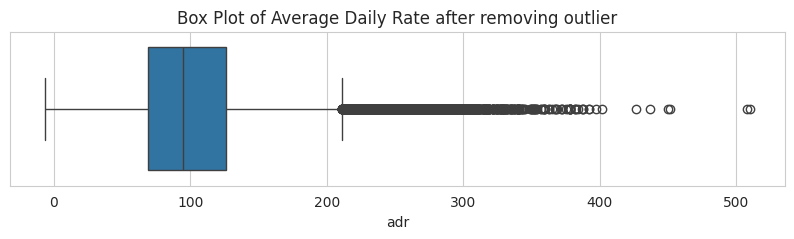

In [17]:
# Create a box plot for the adr attribute
plt.figure(figsize=(10, 2))
sns.boxplot(x=data_df['adr'])
plt.title("Box Plot of Average Daily Rate after removing outlier")
plt.show()

**Discussion: Removing an extreme outlier in the "atr" attribute**

We decided to remove one extreme outlier related to the average daily rate. It exceeded $5,000, which was significantly higher than all other values associated with the attribute. Since this is a critical attribute for our predictive model, we were concerned that the outlier might distort the analysis. The updated box plot confirms that the distribution of the "atr" attribute is now more balanced after removing the outlier.

While we identified other outliers in the dataset, none were as extreme as this case. We opted to keep the others to avoid missing legitimate variations in booking behavior.

In [18]:
# Double-check number of missing values in children
missing_children_before = data_df['children'].isna().sum()
print(f"Missing values in `children` before cleaning: {missing_children_before}")

# Replace missing values with 0
data_df['children'] = data_df['children'].fillna(0)

# Verify the change
missing_children_after = data_df['children'].isna().sum()
print(f"Missing values in `children` after cleaning: {missing_children_after}")

Missing values in `children` before cleaning: 4
Missing values in `children` after cleaning: 0


**Discussion: Replacing missing values with zero in the "children" attribute**

We replaced the four missing values in children with 0, assuming that these missing entries indicate bookings without children. Since children is a numerical attribute, this approach allows us to retain all records while ensuring consistency in the dataset.

***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

In [19]:
# Define columns to remove
drop_cols = ['company', 'agent']

# Drop the columns
data_df = data_df.drop(columns=drop_cols)

# Confirm the updated dataset
print(f"Remaining columns after removal: {data_df.shape[1]}")
print("Updated dataset columns:", list(data_df.columns))

Remaining columns after removal: 31
Updated dataset columns: ['ROW', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


**Discussion: Removing "company" and "agent" from the dataset**

We removed two attributes that were unlikely to provide value in our predictive modeling efforts.

- "company" had excessive missing values (over 90%), making it unreliable for analysis. Since only a small fraction of records contained valid values, we determined that imputing or using it would not be beneficial.
- "agent" was simply an ID number for different booking agents, which does not carry meaningful information for predicting cancellations. Additionally, it had missing values, further limiting its usefulness.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

In [20]:
# add a new column for total_stay that adds weekend + week nights
# place new column after stay_in_week_nights column
data_df.insert(data_df.columns.get_loc("stays_in_week_nights") + 1, "total_stay", data_df["stays_in_week_nights"] + data_df["stays_in_weekend_nights"])

data_df.head(2)

,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0.0,342,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,1,Resort Hotel,0.0,737,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


**Discussion:**
We added a 'total_stay' column to the data frame that adds the values from the 'stays_in_weekend_nights' and 'stays_in_week_nights' columns. The 'total_stays' value adds additional information that may be useful in completing our analysis and training a model.

In [21]:
# add a 'kids&babies' column that combines children and babies
# place new column after 'babies' column
data_df.insert(data_df.columns.get_loc("babies") + 1, "kids&babies", data_df["children"] + data_df["babies"])

data_df.head(2)

,ROW,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,kids&babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0.0,342,2015,July,27,1,0,0,0,2,0.0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,1,Resort Hotel,0.0,737,2015,July,27,1,0,0,0,2,0.0,0,0.0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015


**Discussion** We added a combined 'kids&baby' column to the data frame that adds values from the 'children' and 'babies' columns. The 'kids&babies'column adds additional information that may be useful in completing our analysis and training a model.  

In [22]:
# create list of categorical columns to encode
categorical_cols = [
    'hotel',
    'meal',
    'market_segment',
    'distribution_channel',
    'deposit_type',
    'customer_type',
    'reservation_status',
    'arrival_date_month',
    'reserved_room_type',
    'assigned_room_type'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(data_df, columns=categorical_cols, drop_first=True, dtype=int)

# Check new columns
df_encoded.head(2)

,ROW,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,total_stay,adults,children,babies,kids&babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,hotel_Resort Hotel,meal_FB,...,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P
0,0,0.0,342,2015,27,1,0,0,0,2,0.0,0,0.0,PRT,0,0,0,3,0,0.0,0,0,7/1/2015,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.0,737,2015,27,1,0,0,0,2,0.0,0,0.0,PRT,0,0,0,4,0,0.0,0,0,7/1/2015,1,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Discussion** We encoded categorical variables for analysis, including identifying feature importance.

Top 20 Features Influencing Cancellations:
deposit_type_Non Refund                           : 0.57565
total_of_special_requests                         : 0.10309
market_segment_Online TA                          : 0.09263
lead_time                                         : 0.08688
previous_cancellations                            : 0.07775
reservation_status_No-Show                        : 0.05210
previous_bookings_not_canceled                    : 0.00757
required_car_parking_spaces                       : 0.00158
customer_type_Transient                           : 0.00082
booking_changes                                   : 0.00076
market_segment_Groups                             : 0.00054
customer_type_Transient-Party                     : 0.00024
children                                          : 0.00020
arrival_date_month_May                            : 0.00011
is_repeated_guest                                 : 0.00008
total_stay                                        : 0.000

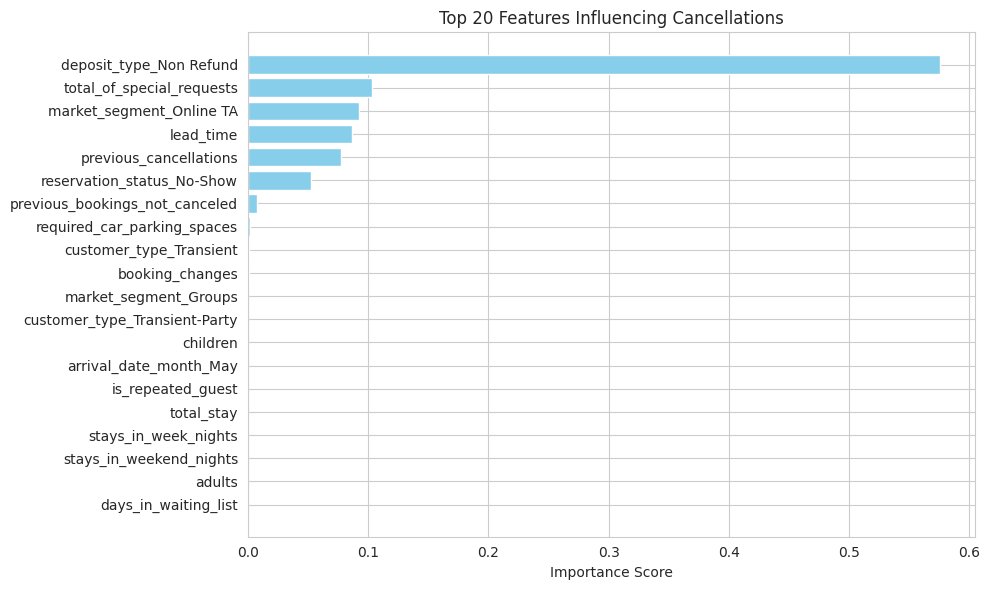

In [23]:
# run feature importance on clean dataframe
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Select features and target
X = df_encoded.drop(['is_canceled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'country', 'reservation_status_date', 'reservation_status_Check-Out', 'ROW'], axis=1)  # Drop target column and non-predictive columns
y = df_encoded['is_canceled']   #define target column

# Train the model
model = DecisionTreeClassifier(random_state=42, max_depth = 5)
model.fit(X, y)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Print top 20 features with their coefficients
print("Top 20 Features Influencing Cancellations:")
print("=========================================")
for i, row in feature_importance.head(20).iterrows():
    print(f"{row['Feature']:50}: {row['Importance']:.5f}")

# plot feature Importance (Top 20)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'].head(20),
        feature_importance['Importance'].head(20),
        color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 20 Features Influencing Cancellations')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


**Discussion** We used feature importance to learn how a future model might rely on specific predictors from the cleaned and encoded dataset. We will keep all remaining predictors in the dataset for now, but we may choose to drop predictors with low importance during future model building.

***
# Section: 4 - Modeling
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**
Based on what we learned in the previous steps. we will develop a Classification algorithm that can take hotel booking information and predict whether a hotel booking will result in a cancellation.

### **Define the Cost Function**

In [30]:
# Helper function for evaluating classification results
# calculates total business cost or benefit of correct and incorrect predictions

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

np.random.seed(42)  # set random seed for reproducibility

def calculate_cost(conf_matrix):    #y_true are true cancelled/not cancelled values, y_pred is predicted cancellations
    # Confusion matrix: summarizes predictions (true neg, false pos, false neg, true pos)

    # Define cost matrix:
    # Rows = Actual [Not Cancel (0), Cancel (1)]
    # Cols = Predicted [Not Cancel (0), Cancel (1)]
    cost_matrix = [[0, -100],     # Actual Not Cancel
                   [-500, -230]]   # Actual Cancel

# benefit = 0 for true negative
# benefit = -100 for false positive (wasted $100 voucher)
# benefit = -500 for false negative (cancellation)
# benefit = -230 for true positive (0.30 × +$400) + (0.70 × –$500)

# loop through each cell in cost matrix and multiplies the number of ocurrences of each prediction by cost/benefit to
# calculate total cost

    total_cost = 0
    for r in range(conf_matrix.shape[0]):
        for c in range(conf_matrix.shape[1]):
            total_cost += cost_matrix[r][c] * conf_matrix[r][c]

    return total_cost    # if this is positive, there's a net benefit from predictions. a negative means the overall outcome is a loss

**Discussion**

We created a cost function based on the following cost matrix:

- **True Positives (TP):** For customers who are legitimate cancellation risks, we assigned a cost of –230 based on the expected outcome of offering a 100 discount that works 30% of the time.
  - Calculation: [30% success rate * (500 saved - 100 discount)] + (70% failure rate * $500 loss) = -230 expected cost

- **False Positives (FP):** For customers falsely identified as cancelation risks,  we assigned a cost of -100 since they received a discount they did not need.

- **False Negatives (FN):** For customers who should have been identified as cancelation risks but were not, we assigned a cost of -500, reflecting the full loss of the reservation.

- **True Negatives (TN):** For customers accurately identified as not being cancelation risks, we assigned a cost of 0 since no actions were taken and no costs were incurred.

### **Split the Dataset into Useful Pieces**

In [32]:
from sklearn.model_selection import train_test_split

# use previously cleaned and encoded data
hotel_data = df_encoded.copy()

# Define predictor variables (X) and target variable (y)
X = hotel_data.drop('is_canceled', axis=1)   # everything except the target
y = hotel_data['is_canceled']                # target


# Get class distribution info
y_unique_values = hotel_data['is_canceled'].unique().tolist()
y_unique_values.sort(reverse = False)
print("Y unique values:", y_unique_values)
print()
print("Cancellation distribution:", hotel_data['is_canceled'].value_counts())
print()

# Split full dataset into train and test sets (70% train, 30% test)
# note: rows are shuffled by default before splitting
X_train_all_att, X_test_all_att, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

print("Training date size:", X_train_all_att.shape[0])
print("Test data size:", X_test_all_att.shape[0])


Y unique values: [0.0, 1.0]

Cancellation distribution: is_canceled
0.0    75166
1.0    44222
Name: count, dtype: int64

Training date size: 83571
Test data size: 35817


***
### **Select the Specific Attributes to Use**
- Based on the Data Understanding step, we may want to use just a subset of X attributes, based on their predictive value.
- Describe what you chose to do (and not do), and why.
***

In [133]:
# Select top 7 attributes identified in the feature importance analysis from step 3
X_attributes_to_use = ['deposit_type_Non Refund',
                       'total_of_special_requests',
                       'market_segment_Online TA',
                       'lead_time',
                       'previous_cancellations',
                       'reservation_status_No-Show',
                       'previous_bookings_not_canceled']
#extract only selected features from the full training and test data sets
X_train = X_train_all_att[X_attributes_to_use]
X_test = X_test_all_att[X_attributes_to_use]

**Discussion**

We selected the top seven attributes with the highest feature importance from our previous analysis. This is intended to keep the model focused on the strongest predictors while avoiding unnecessary complexity.

In [134]:
# Feature Scaling
# It is good practice to scale features so all of them can be uniformly evaluated
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
# Calculate the best possible cost for the test dataset - when the class labels are perfect.
# This is a trick - pass in y_test for both the true and predicted species.
conf_matrix=confusion_matrix(y_test, y_test, labels=[0, 1])
print ("Confusion Matrix (Perfect Predictions):")
print()
print(conf_matrix) # true values in rows, predicted in columns
print()
print(classification_report(y_test, y_test))
print()

# Use custom cost function from above to show total benefit if predections are perfect
best_possible_cost = calculate_cost(conf_matrix)
print("Best Possible - Test data cost (benefit) is: ", best_possible_cost, "total, and per instance", best_possible_cost / len(y_test))

Confusion Matrix (Perfect Predictions):

[[22444     0]
 [    0 13373]]

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     22444
         1.0       1.00      1.00      1.00     13373

    accuracy                           1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817


Best Possible - Test data cost (benefit) is:  -3075790 total, and per instance -85.87514308847754


**Discussion**

A perfect predictive model would accurately identify 22,444 successful reservations and 13,373 cancellations in the dataset. This would result in a total expected cost of approximately –3.08 million, or about –85.88 per reservation with the use of the incentive.

For comparison, if no incentives were given and all 13,373 cancellations incurred the full 500 loss, the total cost would have been approximately –6.69 million, or about –186.74 per reservation. While a net cost remains, this represents a significant reduction in losses and reflects the best possible outcome under the current strategy.

***
### **Configure the off-the-shelf KNN classifier**
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [136]:
# configure off-the-shelf KNN classifier
# use KNeighbors classifier from SciKit Learn library
from sklearn.neighbors import KNeighborsClassifier

knn_num_neighbors = 5
classifier = KNeighborsClassifier(n_neighbors = knn_num_neighbors)

**Discussion**

We configured the K-Nearest Neighbors (KNN) classifier using 5 neighbors as a starting point. This is a common default that provides a balanced performance.

***
### **Run and Evaluate the Classifier for a Single (Example) K Parameter Value**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [137]:
# Run and evaluate the classifier for a single (example) K parameter value
# evaluate the performance of the classifier using the evaluation method defined above

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [138]:
# generate the predictions for the training data
y_pred = classifier.predict(X_train)

In [139]:
# Evaluate the results of the prediction
# Confusion Matrix
conf_matrix = confusion_matrix(y_train, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(conf_matrix)     #true values in rows, predicted in columns
print()


# Use cost function to evaluate predictions
knn_train_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Training data cost (benefit) is: ", knn_train_cost, "total, and per instance", knn_train_cost / len(y_test))

Confusion Matrix:
[[46895  5827]
 [11191 19658]]

5 Nearest Neighbor - Training data cost (benefit) is:  -10699540 total, and per instance -298.72797833431054


**Discussion**

Using the training data, the model achieved a total cost of approximately -10.7 million, or about -298.73 per booking. The confusion matrix correclty predicted 46,895 non-cancellations and 19,658 true cancellations.

In [140]:
# generate predictions for test data
y_pred = classifier.predict(X_test)

In [141]:
# evaluate results of predictions
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(conf_matrix)
print()

print(classification_report(y_test, y_pred))
print()

# Use cost function to evaluate predictions
knn_cost = calculate_cost(conf_matrix)
print(knn_num_neighbors, "Nearest Neighbor - Test data cost (benefit) is: ", knn_cost, "total, and per instance", knn_cost / len(y_test))

Confusion Matrix:
[[19720  2724]
 [ 5014  8359]]

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84     22444
         1.0       0.75      0.63      0.68     13373

    accuracy                           0.78     35817
   macro avg       0.78      0.75      0.76     35817
weighted avg       0.78      0.78      0.78     35817


5 Nearest Neighbor - Test data cost (benefit) is:  -4701970 total, and per instance -131.27760560627635


**Discussion**

Using the test data, the model correctly predicted 19,720 'not canceled' bookings. 2,724 bookings were predicted as 'canceled' but were not actually canceled (false positives). 5,014 bookings were predicted as 'not canceled' but were actually canceled (false negatives). 8,359 bookings were correctly predicted as 'canceled' (true positives).

Overall, the model resulted in a total estimated cost of -4.7 million, or about -$131.28 per booking. While the accuracy of 78% shows improvement over not using a model, there is still an overall cost because cancellations remain difficult to predict, and the incentive program is only partially effective.


***
### **Run and Evaluate the Classifier for a Range of K Parameter Values**
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [143]:
# run and evaluate the classifier for a range of k parameter values to find the best model
# evaluate the performance of the classifier, using the evaluation method defined above
# calculate quality measures for various K values
quality_accuracy_meas = []      #stores accuracy for each K
quality_cost_meas = []       #stores cost for each k
best_acc = 0           #tracks the highest accuracy
best_cost = float('-inf')          #tracks the best (highest) cost (higher cost = worse)
best_acc_k = -1       # best K value for accuracy
best_cost_k = -1     #best k value for cost

for k in range(1, 50):            #loop over k values 1 - 50
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)     # fit model on training data
    y_pred = knn.predict(X_test)    # predictions are made on the test data
    acc  = accuracy_score(y_test, y_pred)
    cost = calculate_cost(confusion_matrix(y_test, y_pred, labels=[0,1]))
    quality_accuracy_meas.append(acc)        # compute accuracy
    if acc > best_acc:
        best_acc = acc            # if current accuracy is better than previous best, update best_acc and best_acc_k
        best_acc_k = k
    quality_cost_meas.append(cost)   # cost (benefit) values
    if cost > best_cost:
        best_cost = cost
        best_cost_k = k

print("Best Accuracy:", best_acc, "  Best Accuracy K:", best_acc_k, "  Best Cost:", best_cost, "  Best Cost K:", best_cost_k)

Best Accuracy: 0.811486165787196   Best Accuracy K: 49   Best Cost: -4577870   Best Cost K: 49


**Discussion**

The best K value for both accuracy and cost was 49, which resulted in approximately 81% accuracy. Despite this improvement, the total cost remained a loss of about -4.58 million.

Although the model does not fully offset cancellation losses, it meaningfully reduces costs compared to taking no action by helping target incentives more effectively.

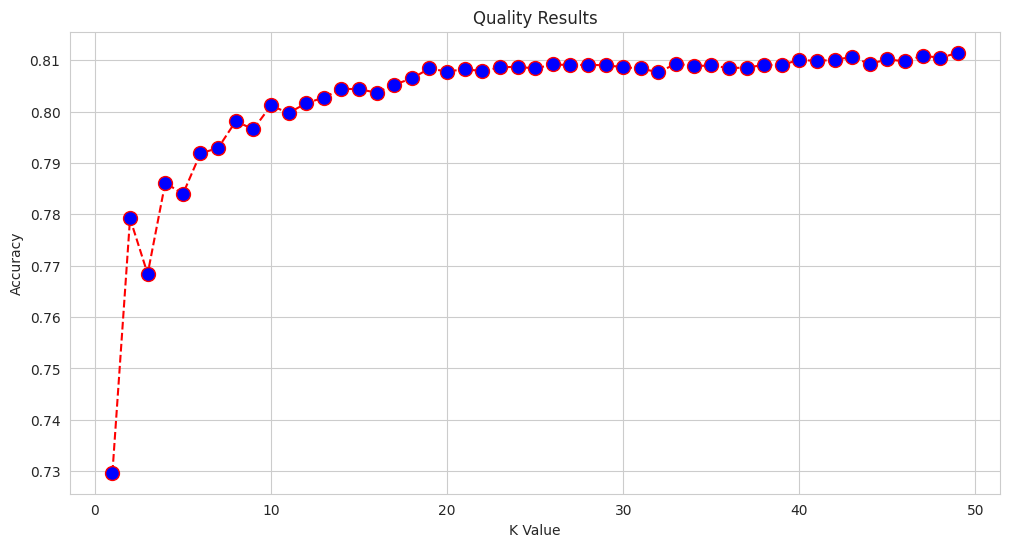

In [144]:
# Plot the accuracy values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_accuracy_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

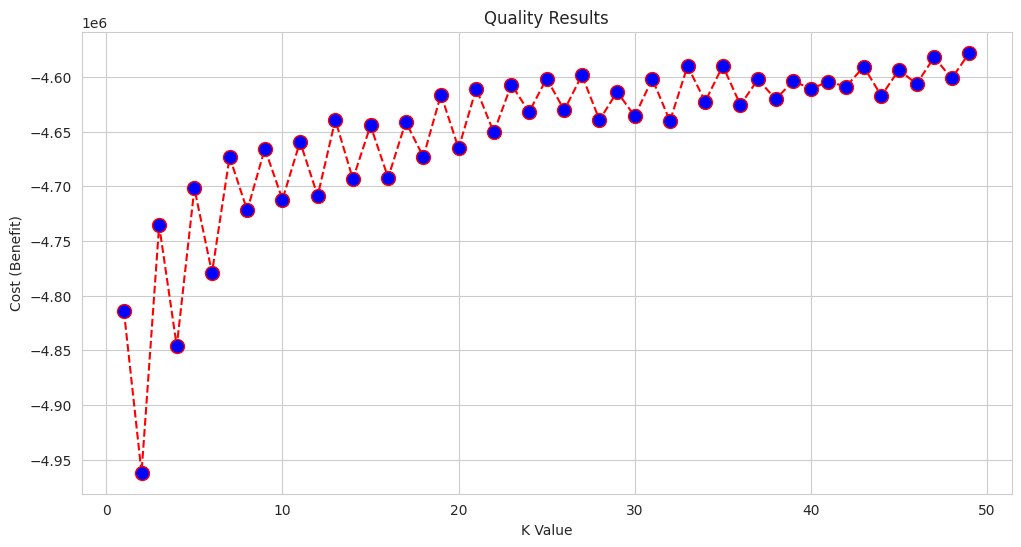

In [145]:
# Plot the cost values against K values.
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), quality_cost_meas, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Quality Results')
plt.xlabel('K Value')
plt.ylabel('Cost (Benefit)')
plt.show()

**Discussion**

The first graph shows that as the K value increased, the accuracy of the model improved, peaking at around 81% accuracy at K=49. The second graph illustrates that the cost benefit consistently decreased as K increased, confirming that the lowest cost (-4.58 million) corresponded with K=49.

Both visuals provide support to the conclusion that 49 is the best K value for this model.

***
# Section: 5 - Evaluation
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

We evaluated the KNN model while we were developing it during the Modeling phase of this project. In doing so, we tested various K values and determined that K=49 provided the best results with approximately 81% accuracy. It also provided the most effective cost reduction of cancellations at -4.58 million.

While the model does not eliminate cancellation costs entirely, it successfully reduces losses compared to taking no action at all. Without using incentives with this predictive model, the cost of the cancellations in this dataset would be -6.69 million.

Based on these findings, we recommend that Buckeye Resorts, Inc. proceeds with implementing this model as a starting point for reducing the overall business cost of hotel cancellations.

***
# Section: 6 - Deployment
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**
- Please fill in a response...

***
# Section: Conclusions
- What did you learn from this exercise?
***

**Discussion** We learned how to construct the target dataset based on the insights learned from the Data Understanding step. This included handling missing and erroneous data, and transforming or eliminating attributes.